<div class="alert alert-block alert-success">  <!>it can be warning, info or success</!>
<h1> Exploratory Data Analysis (EDA) </h1>

# Introduction

### Overview

EDA is the **first step** to do for any data science project to **get an overview** of the data, but there is **no one-fit all procedure** for EDA and the actual steps taken depends heavily on the specific project. That means:

- We **can't enumerate** everything people can do with EDA but only a snapshot
- It is important to know about the **context** of the project

**Context**: We are investigating an employee dataset called [HR Employee Analytics](https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics) from kaggle
- Note: the main questions we are interested in is the **main reasons behind attrition, i.e. what makes employees leave their positions**.

Tools: some common Python packages for EDA include: `numpy`, `pandas`, `matplotlib`, `seaborn`, and many other packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%config InlineBackend.figure_format = 'retina'

### Load and First Impression
Procedually, the very first step is **load the data** using pandas function. Most of the time we are dealing with tabular data, so we use the appropriate pandas function to load the data.

For tabular data, some people find it convenient or comfortable to **print tiny part of the data** in the original structure for the very first impression.

In [2]:
df_hr = pd.read_excel('HR_Employee_Data.xlsx')
df_hr.head()  # print first 5 line of data

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


But of course, we cannot simply scroll through all the data. So conceptually, the first step of EDA is to get summary information.

## Step 1. Summarize

### Type 1: Column information

`DataFrame.info()` gives the following information:

- column name
- data type
- missing data (although might be hard to check here)

In [3]:
# print key information of the columns
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


Two things to emphasize:

#### Know about the columns

Ask data source on what columns are about

- `Emp_Id`: Employee ID
- `satisfaction_level`: Satisfaction level of employee in percentage. 100% or 1 is very satisfied. 0% or 0 is not satisfied
- `last_evaluation`: Time from last evaluation in years
- `number_project`: Number of projects an employee is working on
- `average_montly_hours`: Average hours worked by employee in last 3 months
- `time_spend_company`: Time spend my employee commuting to office (presumably in hours)
- `Work_accident`: If the employee was involved in a work accident
- `left`: If the employee has left the company
- `promotion_last_5years`: If the employee has a promotion in past 5 years
- `Department`: Department employee is working in

#### Group the columns

Dimensions to consider

- Target vs Feature
    - Target/Response - `left`
    - Feature/Predictors - everything else except `EmpID`
- Data type 
    - Categorical: `Work_accident`, `promotion_last_5years`, `Department`, `Salary`
    - Numeric: `satisfaction_level`, `last_evaluation`, `average_montly_hours`, `time_spend_company`
    - Note: *our data types can be different from what pandas inferred from the data. For various purpose, there's no need to change the data type right now but cast data type as needed using* `DataFrame[col].astype('type')`

In [4]:
# group columns
cat_vars = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']
num_vars = ['satisfaction_level', 'last_evaluation',
            'average_montly_hours', 'time_spend_company']

### Type 2: Distribution

#### Numbers

`DataFrame.describe()` is the key function for summary statistics
- For numerical columns, it gives the five number summary
- For categorical columns, it gives counts, unique elements, and top category.

#### Plots

But compared to pure numbers, we usually prefer **plotting**, especially univariate plots that can be plotted in batch.
- **Bar plot** for **categorical variables**
    - If the variable is treated by pandas as numerical, then further fine tuning is necessary for ticks
- **Histogram** for **numeric variables**

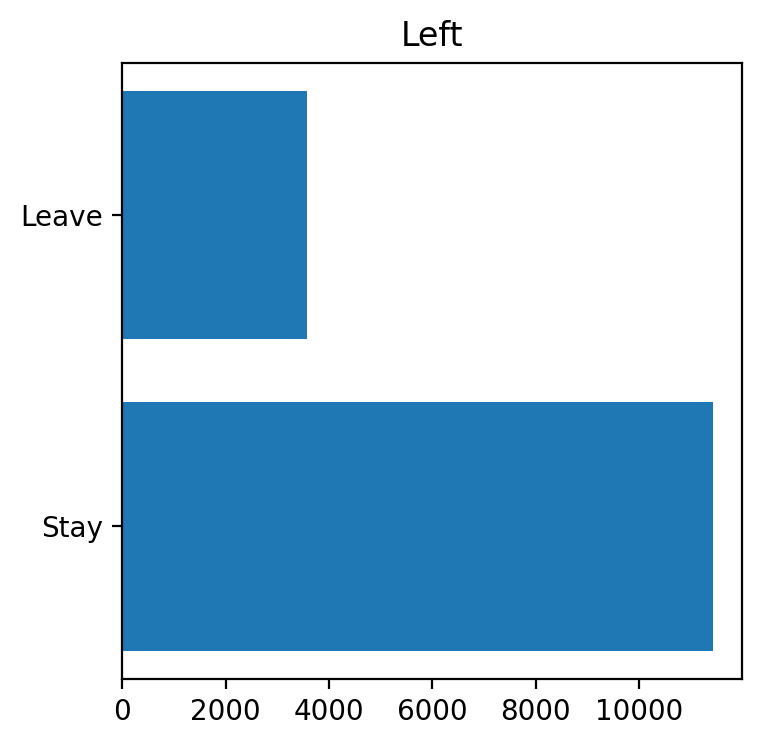

In [5]:
# bar plot for target
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
count = df_hr['left'].value_counts()
ax.barh(count.index, count.values)
ax.set_title("Left")
ax.set_yticks([0, 1])
ax.set_yticklabels(["Stay", "Leave"])
plt.show()

**Observation**: There are far more employees who stay compared to those who leave. We may want to keep this class imbalance in mind in the future

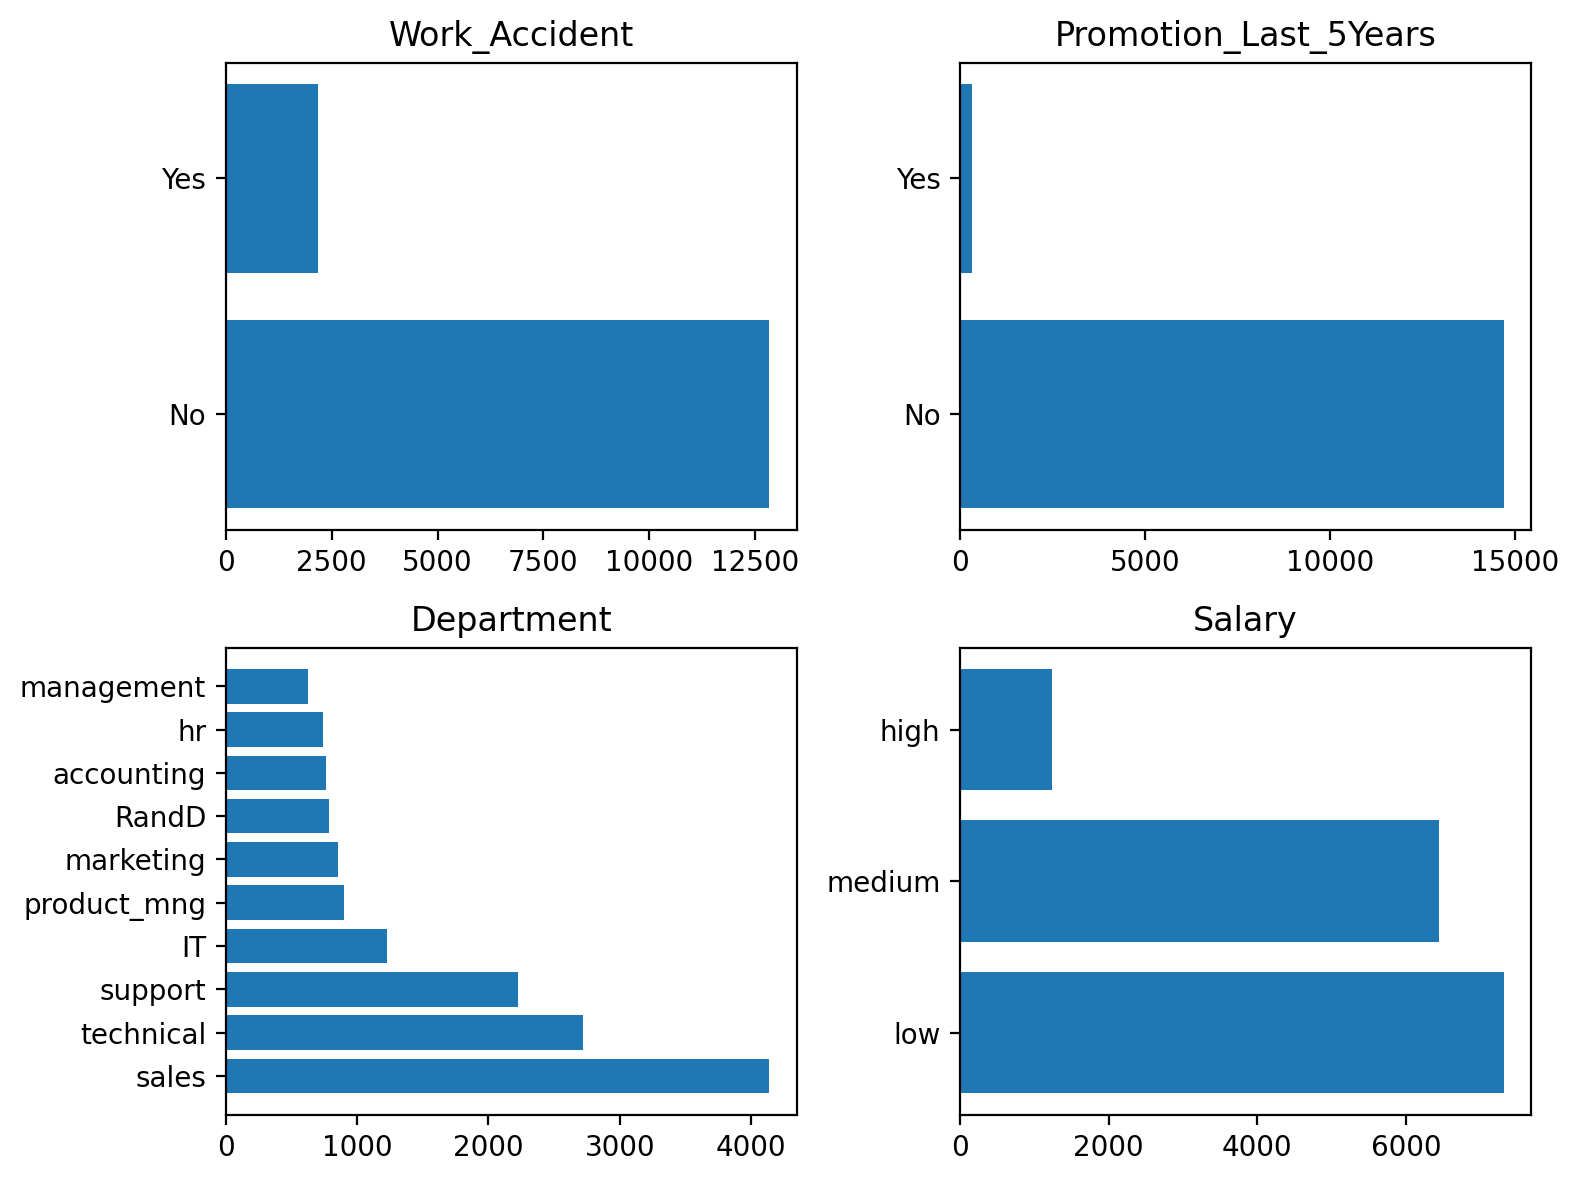

In [6]:
# bar plot for categorical features
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()
for i in range(len(cat_vars)):
    col = cat_vars[i]
    count = df_hr[col].value_counts()
    ax[i].barh(count.index, count.values)
    ax[i].set_title(col.title())
    # ticks for those which appear to be numeric but in fact categorical
    if col in ["Work_accident", "promotion_last_5years"]:
        pass
        ax[i].set_yticks([0, 1])
        ax[i].set_yticklabels(['No', 'Yes'])
plt.tight_layout()
plt.show()

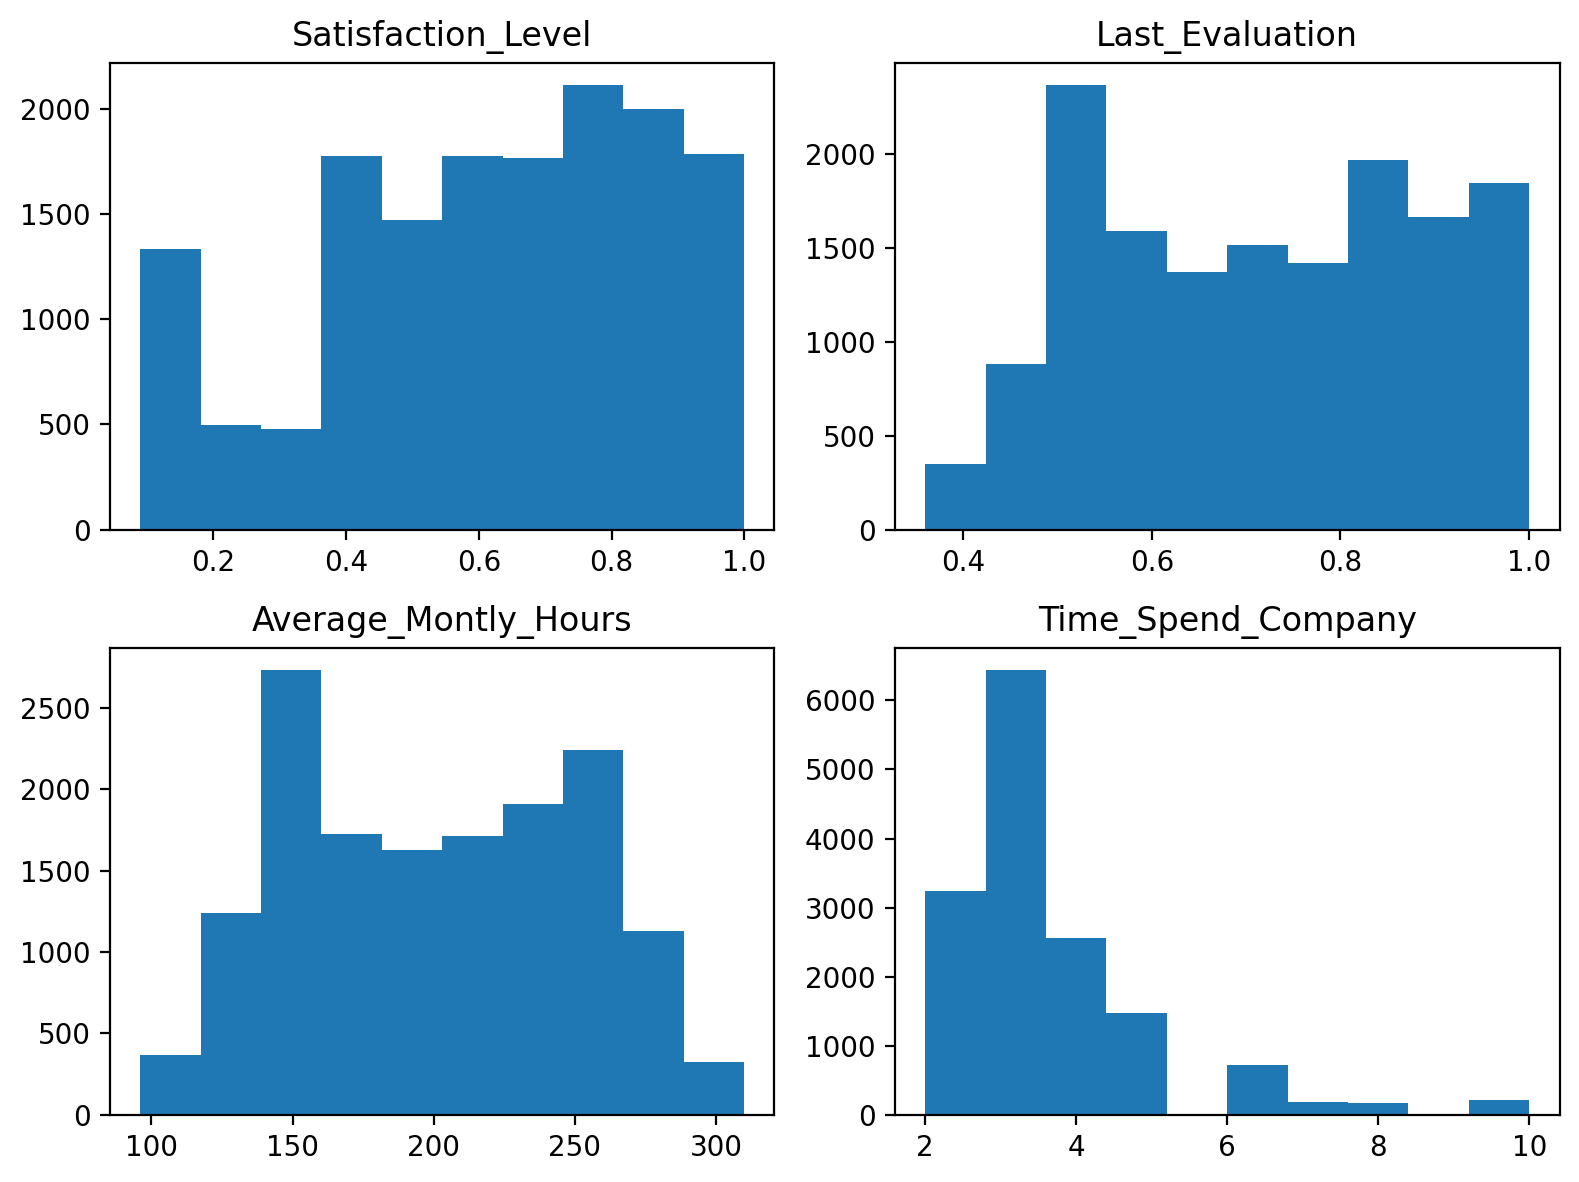

In [7]:
# histogram for numeric features
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()
for i in range(len(num_vars)):
    col = num_vars[i]
    ax[i].hist(df_hr[col])
    ax[i].set_title(col.title())
plt.tight_layout()
plt.show()

# Step 2. Clean and Transform

This dataset in fact fairly clean, but that doesn't mean we don't need to do any cleanning

Again, we will only go over some examples among many things one can do for data cleanning.

### Example 1: Unique value check for categorical variables

Sometimes missing values in a **categorical variable** are hidden as text (e.g. "missing"). So it is important to dig them out through `DataFrame[col].unique()`

In [8]:
# Example: check whether salary column contains any suspicious values
df_hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

### Example 2: Transformation Functions

There are some customizable template functions that be used to programmatically process data

In [9]:
def df_normalize_strings(df, col):
    df[col] = df[col].str.lower()  # changing to lower cases
    df[col] = df[col].fillna(np.nan)  # make nan -> np.nan
    df[col] = df[col].replace('none', np.nan)
    df[col] = df[col].replace('no', np.nan)
    df[col] = df[col].replace('#name?', np.nan)
    df[col] = df[col].replace('', np.nan)  # empty -> NaN

In [10]:
df_normalize_strings(df_hr, "Department")
df_normalize_strings(df_hr, "salary")

In [11]:
def clean_header(df):
    """This functions removes weird characters and spaces from column names, while keeping everything lower case"""
    df.columns = df.columns.str.strip().str.lower().str.replace(
        ' ', '_', regex=False).str.replace('(', '', regex=False).str.replace(')', '', regex=False)

In [12]:
clean_header(df_hr)

In [13]:
def split_columns(df, orig, one, two, separator):
    """
    orig: string name of the column we want to split
    one: string name of the first new column
    two: string name of the second new column
    separator: string - this is the character(s) that will define where to split
    """
    df[[one, two]] = df[orig].str.split(separator, expand=True)

### Example 3 Sub-data set

Create subsets of data so that we don't need to filter again and again. For example, it is usually useful to divide the data according to the target variable.

In [14]:
# divide data into thouse who have left and those who stays
df_hr0 = df_hr[df_hr['left'] == 0]
df_hr1 = df_hr[df_hr['left'] == 1]

**And many many more......**

# Step 3. Explore

Notes: 

- For aesthetic purpose, often it is convenient to pre-define a few sets of colors
- There's never a stopping point for fine tuning plots, so the visualization codes **can quickly get complicated**. Do not get overwhelmed by the details but **focus on the big picture**

In [15]:
# pre define sets and color pallet
set1 = dict(facecolor='#f2bc94', edgecolor='none')
set2 = dict(facecolor='#afc9b4', edgecolor='none')
set3 = dict(facecolor='white', edgecolor='none')
set4 = dict(facecolor='#f5d87a', edgecolor='red')
col_pal = ['#94d0c0', '#959c9e', '#ccb22b',
           '#31a1b3', '#a39fc9', '#6fb899', '#027b8e']

## 3.1 Heatmap of all numerical variables 

<b>A Heatmap helps us in observing:</b>
<ul>
<li> Correlation between different variables or features</li>
<li> Any direct relation betwen the target variable and various features</li>   
</ul>
</div>

In [16]:
# here we only focus on a few features
df = df_hr[['number_project', 'average_montly_hours',
            'time_spend_company', 'work_accident', 'promotion_last_5years', 'left']]

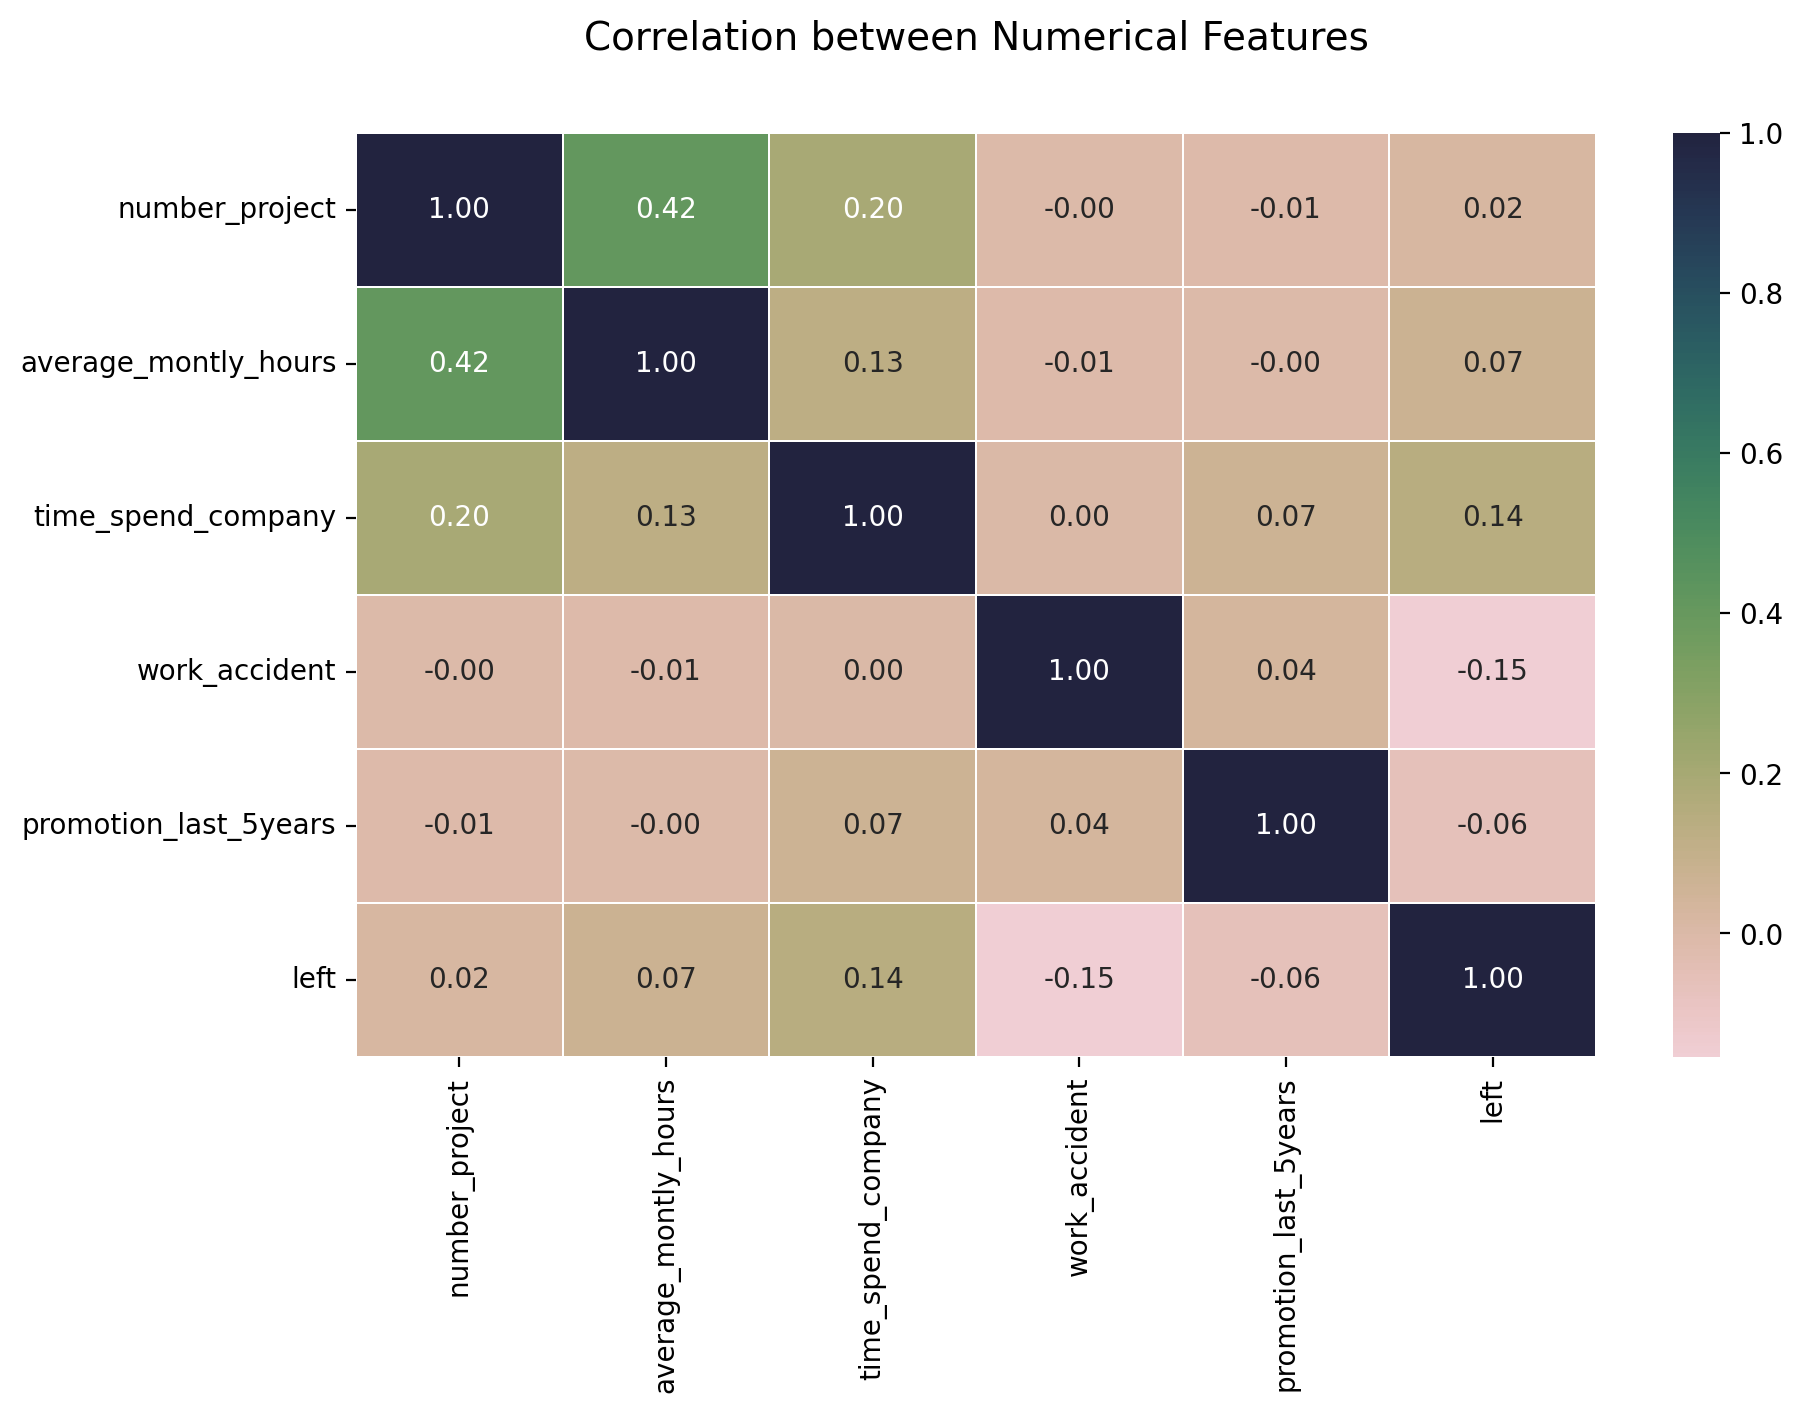

In [17]:
# correlation plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), cmap=sns.color_palette("ch:s=.4,rot=-1",
            as_cmap=True), linewidths=.1, annot=True, fmt='.2f')

ax.set_title('Correlation between Numerical Features', pad=30, fontsize=14)
plt.show()

## 3.2 Multi-variate plots

A multi-variable plot helps us in:
<ul>
<li> <b>Deep diving into impacts of one feature the other features, or on the target variable</b></li> 
</ul>
</div>

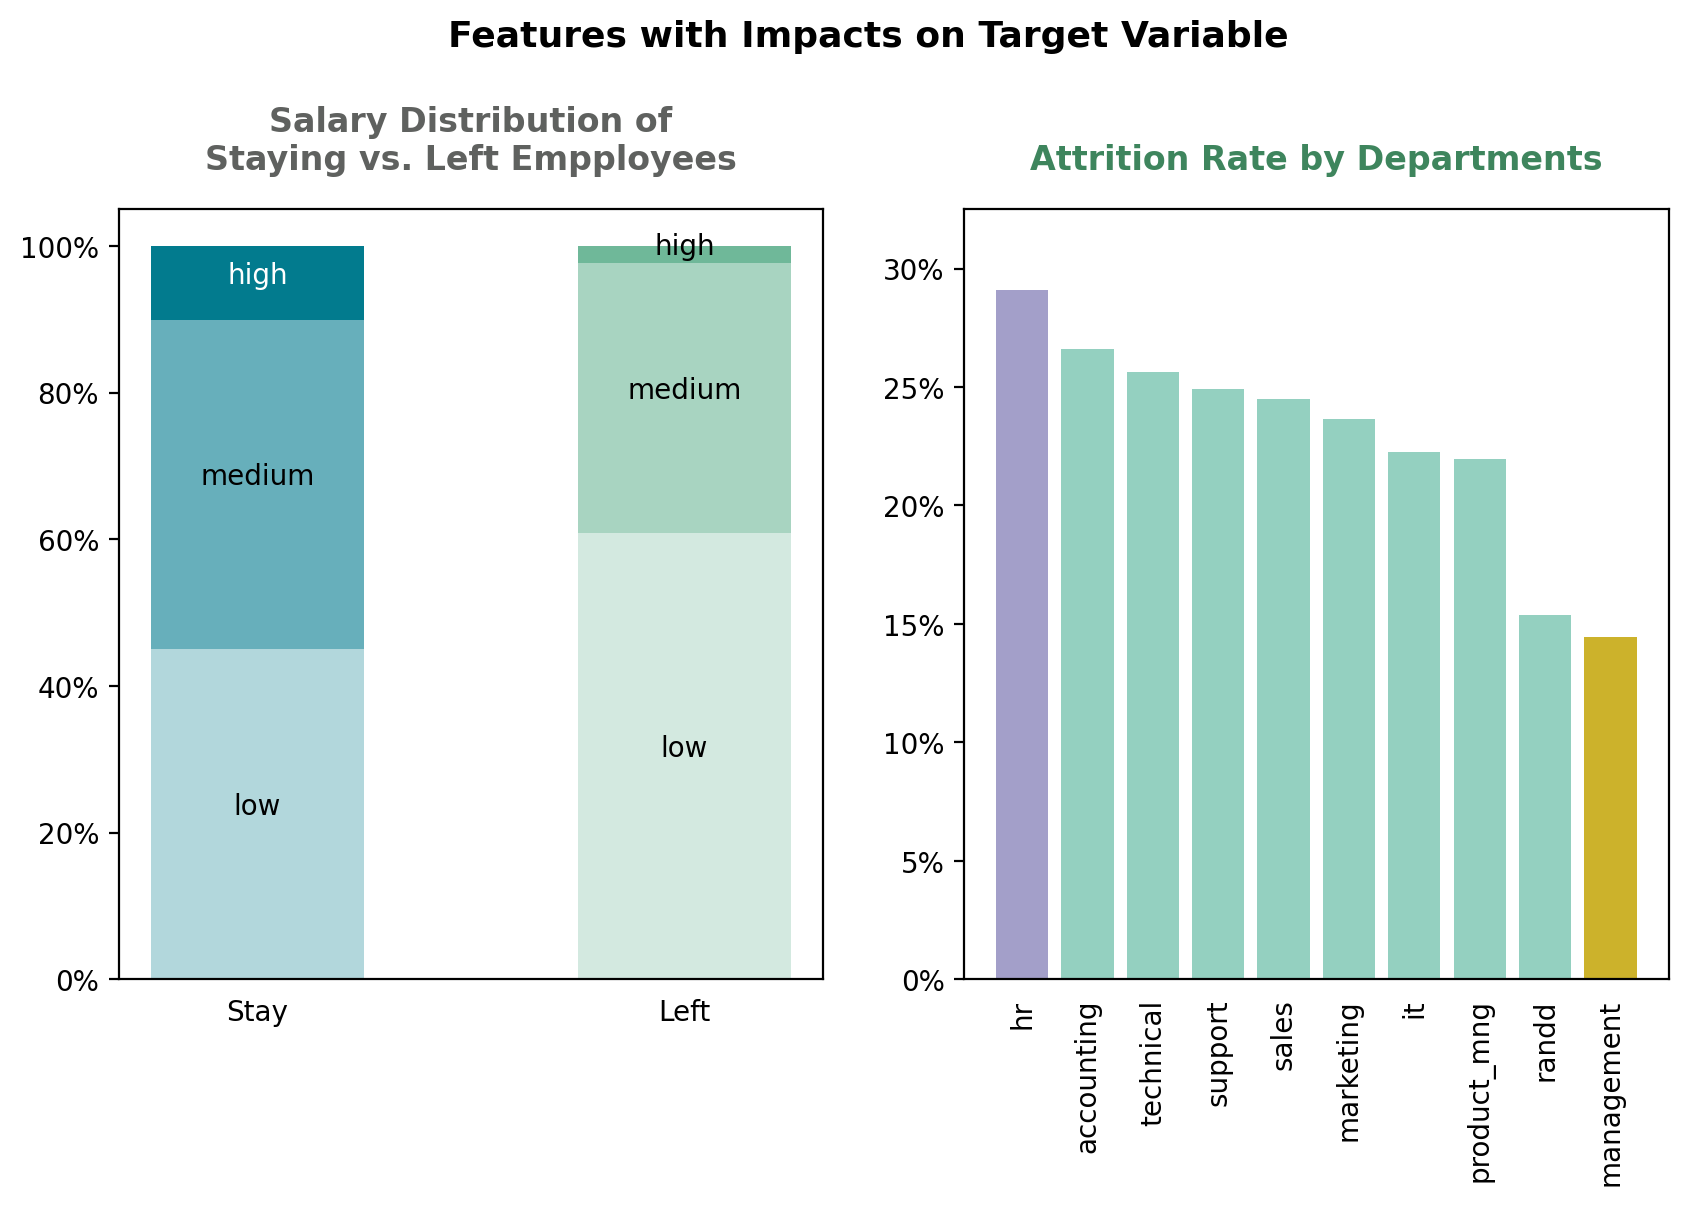

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Features with Impacts on Target Variable',
             x=0.5, y=1.07, fontweight="bold", size=13)
# salary plot
stay_salary = df_hr0['salary'].value_counts()/len(df_hr0)
left_salary = df_hr1['salary'].value_counts()/len(df_hr1)
low = np.array([stay_salary[0], left_salary[0]])
med = np.array([stay_salary[1], left_salary[1]])
high = np.array([stay_salary[2], left_salary[2]])
# plot
axes[0].bar([0, 1], low, width=0.5, color=[
            '#027b8e', '#6fb899'], alpha=0.3, label='low')
axes[0].bar([0, 1], med, bottom=low, width=0.5, color=[
            '#027b8e', '#6fb899'], alpha=0.6, label='medium')
axes[0].bar([0, 1], high, bottom=low+med, width=0.5,
            color=['#027b8e', '#6fb899'], alpha=1, label='high')
# ticks and labels
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Stay', 'Left'])
axes[0].set_yticks(np.arange(0, 1.01, 0.2))
axes[0].set_yticklabels([f"{i}%" for i in range(0, 101, 20)])
axes[0].tick_params(axis='x', bottom=False)
axes[0].set_title('Salary Distribution of\nStaying vs. Left Empployees',
                  fontweight="bold", color='#5f615f', y=1.03)
# coloring
labels = ['low', 'medium', 'high', 'low', 'medium', 'high']
x = [0, 0, 0, 1, 1, 1]
y = [low[0]/2, low[0]+med[0]/2, low[0]+med[0]+high[0]/2,
     low[1]/2, low[1]+med[1]/2, low[1]+med[1]+high[1]/2]
colors1 = ['black', 'black', 'white', 'black', 'black', 'black']
for x, y, l, c in zip(x, y, labels, colors1):
    axes[0].text(x, y, l, color=c, ha='center')

# department plot
axes[1].set_ylim(0, 0.325)
dept_left_percen = (df_hr1['department'].value_counts(
)/df_hr['department'].value_counts()).sort_values(ascending=False)
colors2 = ['#a39fc9', '#94d0c0', '#94d0c0', '#94d0c0', '#94d0c0',
           '#94d0c0', '#94d0c0', '#94d0c0', '#94d0c0', '#ccb22b']
# ticks and label
axes[1].bar(range(len(dept_left_percen)), dept_left_percen, color=colors2)
axes[1].set_xticks(range(len(dept_left_percen)))
axes[1].set_xticklabels(dept_left_percen.index.to_list(), rotation=90)
axes[1].set_yticks(np.arange(0, 0.31, 0.05))
axes[1].set_yticklabels([f"{i}%" for i in range(0, 31, 5)])
axes[1].tick_params(axis='x', bottom=False)
axes[1].set_title('Attrition Rate by Departments',
                  fontweight="bold", color='#3e855d', y=1.03)

plt.show();

## 3.3 Decision Making - Deep dive into individual features</b></h4>

<ul>
<li> <b>Creating a comprehensive plot of a single feature, showing how it can formulate a businss decicion</b></li> 
</ul>
</div>

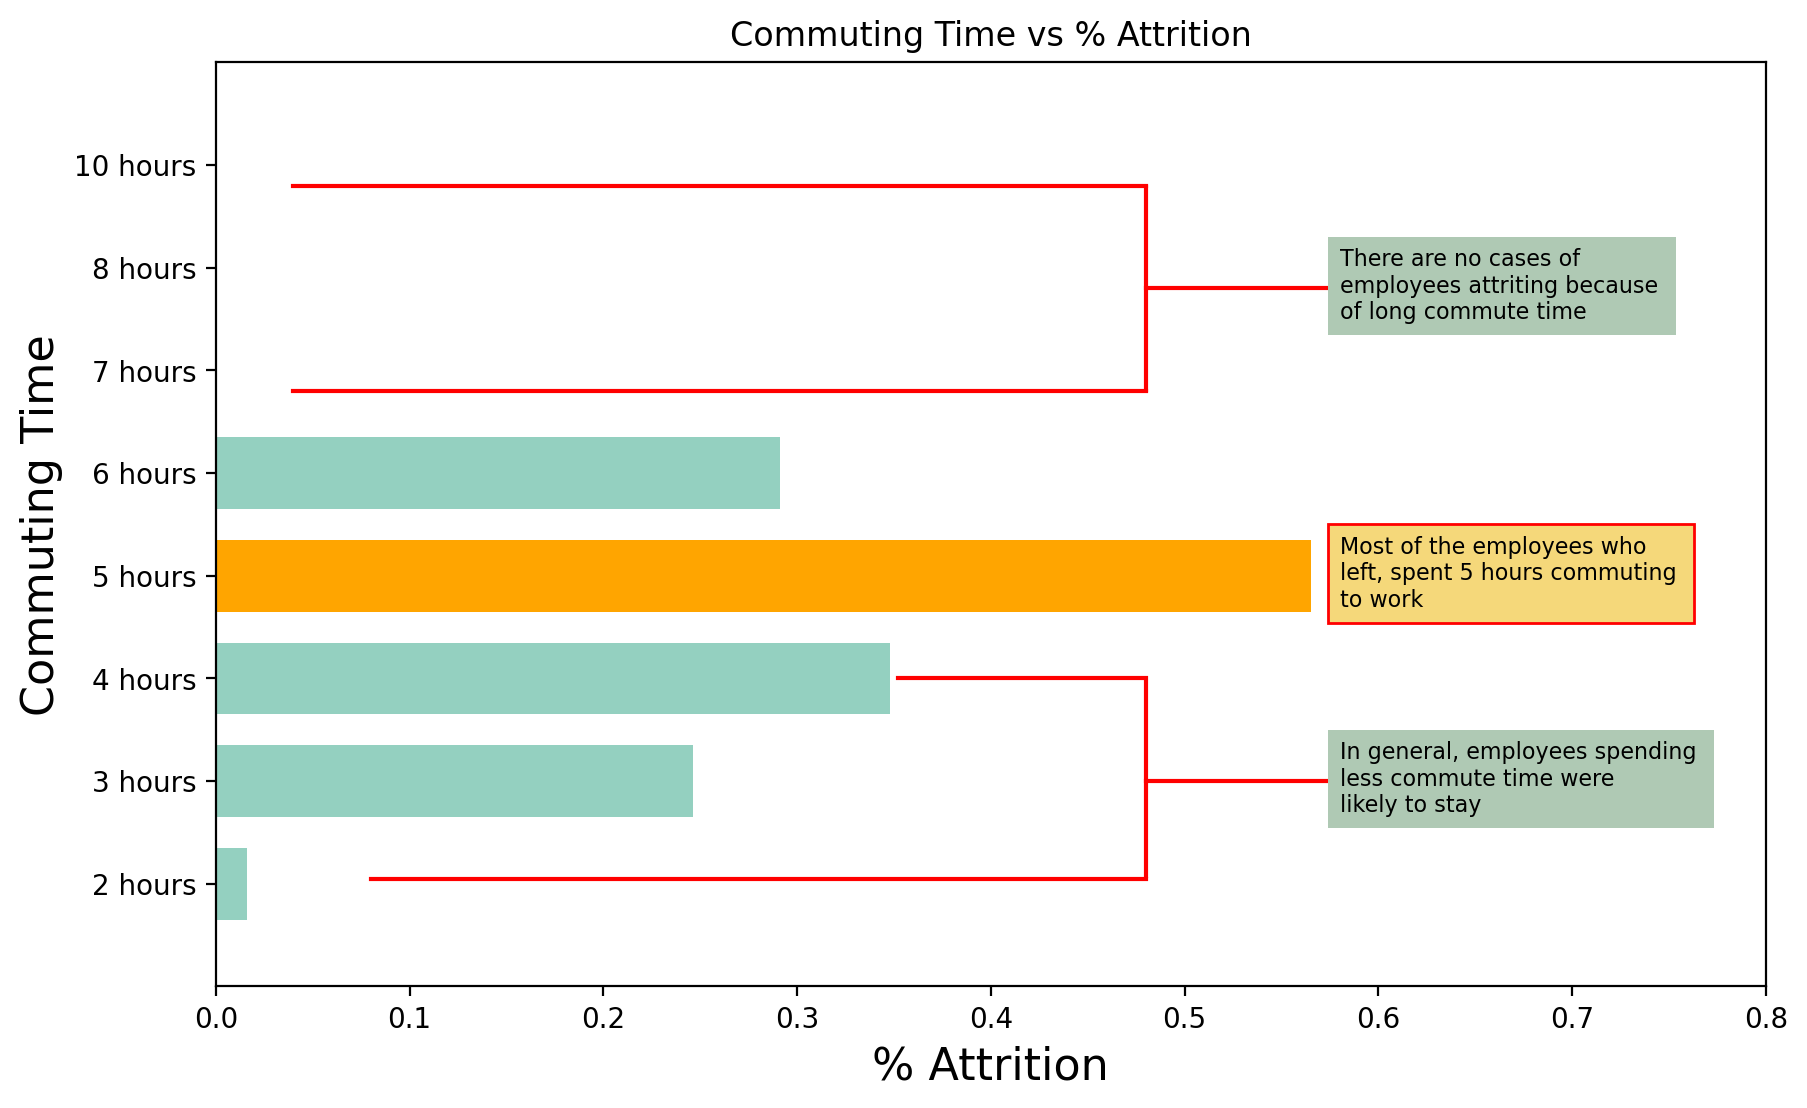

In [19]:
time_tab = df_hr.groupby('time_spend_company').mean()['left']
frame = {'Commuting Time': time_tab.index.values, 'Attrition': time_tab.values}
time_df = pd.DataFrame(frame)

# values to draw the plot
y_val = time_df['Commuting Time'].values
x_val = time_df['Attrition'].values

# positions and labels for y axis
y = np.arange(2, 9, 1)
w = 0.7
y_val = [f'{n} hours' for n in time_df['Commuting Time'].values]
y_label = [n for n in time_df['Commuting Time'].values]
colors = ['#94d0c0', '#94d0c0', '#94d0c0', 'orange',
          '#94d0c0', '#94d0c0', '#94d0c0', '#94d0c0']
edgecolors = ['none', 'red', 'none', 'none',
              'none', 'none', 'none', 'none', 'none']

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(0, 0.8)
ax.set_ylim(-1, 8)
# plot
ax.barh(y_val, x_val, w, color=colors, label='Unemployment')
# labels and titles
ax.set_xlabel('% Attrition', fontsize=16, x=.5, y=-20)
ax.set_ylabel('Commuting Time', fontsize=16, x=-.1, y=.5)
ax.set_title('Commuting Time vs % Attrition')
# annotation
ax.text(0.58, 2.7, 'Most of the employees who \nleft, spent 5 hours commuting \nto work',
        fontsize=8, bbox=set4)
ax.text(0.58, 0.7, 'In general, employees spending \nless commute time were \nlikely to stay',
        fontsize=8, bbox=set2)
ax.text(0.58, 5.5, 'There are no cases of \nemployees attriting because \nof long commute time',
        fontsize=8, bbox=set2)
# pointers
plt.axhline(y=4.8, xmin=0.05, xmax=0.6, color='red')
plt.axhline(y=6.8, xmin=0.05, xmax=0.6, color='red')
plt.axvline(x=0.48, ymin=0.645, ymax=0.865, color='red')
plt.axhline(y=5.8, xmin=0.6, xmax=0.75, color='red')
plt.axhline(y=2, xmin=0.44, xmax=0.6, color='red')
plt.axhline(y=0.05, xmin=0.1, xmax=0.6, color='red')
plt.axvline(x=0.48, ymin=0.12, ymax=0.33, color='red')
plt.axhline(y=1.0, xmin=0.6, xmax=0.75, color='red')

plt.show();

<div class="alert alert-block alert-success">  <!>it can be warning, info or success</!>
<h2>Last: Conclusion, or Onwards </h2>
From the <b>Exploratory Data Analysis</b> of the dataset, we could conclude the following: <br>
<h4>- Features that affect attrition in the organization: </h4>
<ul>
    <li>Satisfaction level </li>
    <li>Commute time </li>
    <li>Salary </li>
    <li>Allocated departments </li>
</ul>
<h4>- It is pretty clear that high salary leads to lower attrition rate across different satisfaction
levels</h4>
<ul>
<li>It is recommended to initiate employee engagement activities which might
    enhance the much needed work-life balance</li>
    </ul>
<h4>- Employees who spent 4 hours or less in commuting, were most likely to stay</h4>
<ul>
<li>The organization can incentivize employees to work remotely or to stay closer to the office
    location</li>
</ul>
</ul>